# Baseball Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [5]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df = df.rename(columns={'W':'Wins', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 
                   'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 
                   'ERA':'Earned Run Average', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})

df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [8]:
df.shape

(30, 17)

In [9]:
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

## Data Visualization

'Runs' and 'Wins'

In [11]:
df.groupby('Runs')['Wins'].mean()

Runs
573     67.0
613     71.0
622     76.0
626     63.0
640     64.0
644     80.0
647    100.0
650     74.0
655     68.0
656     76.0
661     85.0
667     92.0
669     81.0
683     90.0
689     85.5
694     68.0
696     83.5
697     98.0
703     83.0
713     81.0
720     79.0
724     95.0
729     86.0
737     68.0
748     78.0
751     88.0
764     87.0
891     93.0
Name: Wins, dtype: float64

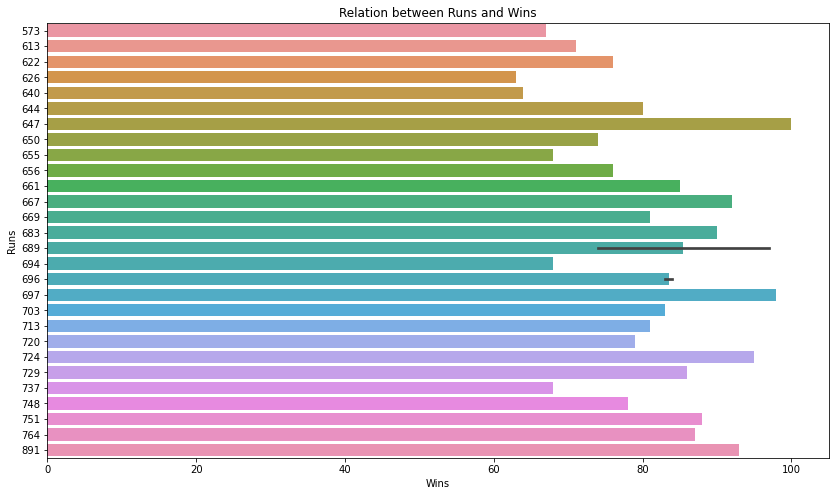

In [12]:
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='Runs', data=df, orient='h')
plt.title('Relation between Runs and Wins')
plt.show()

At 'Bats' and 'wins'

In [13]:
df.groupby('At Bats')['Wins'].mean()

At Bats
5385     92.0
5417     85.0
5420     67.0
5428     83.0
5439     81.0
5457     74.0
5459     86.0
5463     71.0
5467     83.0
5480     68.0
5484    100.0
5485     80.5
5491     97.0
5509     93.0
5511     88.0
5527     90.0
5529     63.0
5533     76.0
5544     76.0
5565     84.0
5567     87.0
5571     64.0
5572     68.0
5575     95.0
5600     68.0
5605     74.0
5631     98.0
5640     78.0
5649     79.0
Name: Wins, dtype: float64

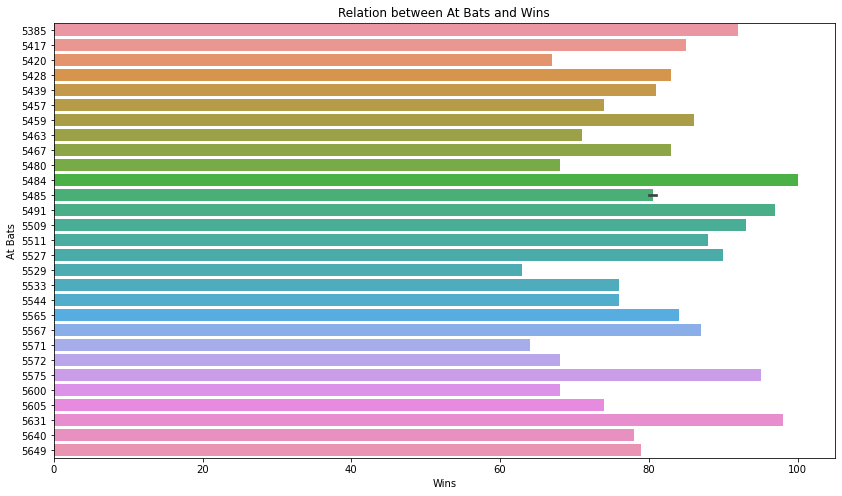

In [14]:
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='At Bats', data=df, orient='h')
plt.title('Relation between At Bats and Wins')
plt.show()

#### Checking all variables 

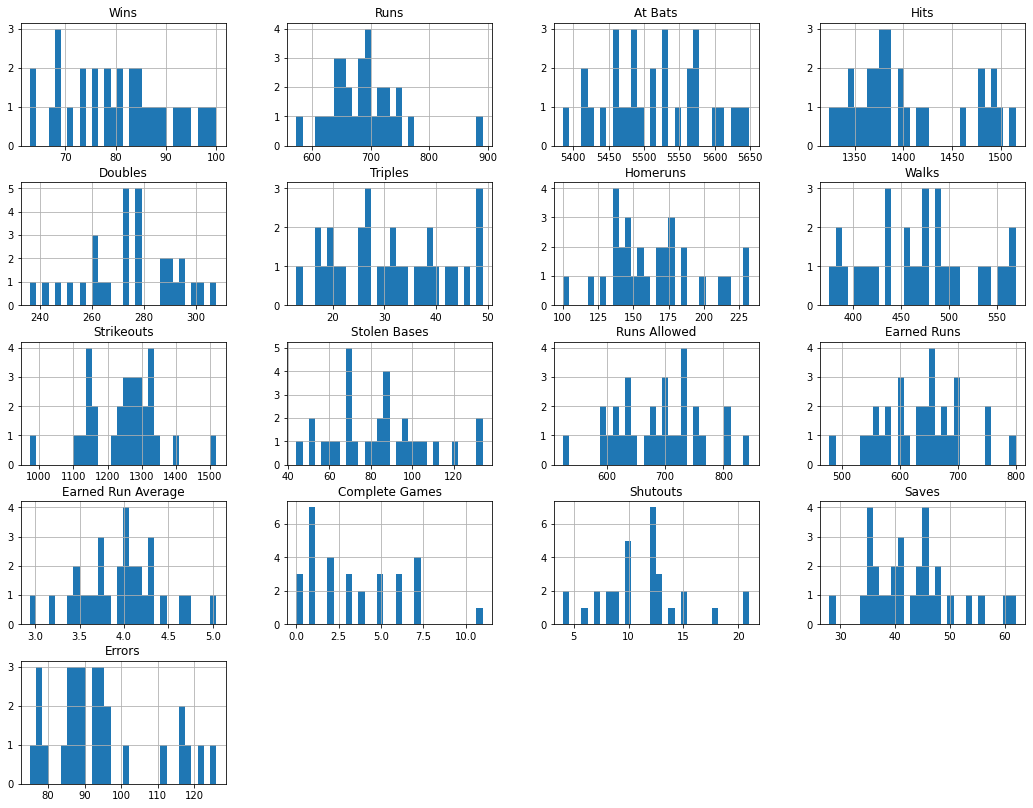

In [15]:
df.hist(figsize=[18,14], bins=30, grid=True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

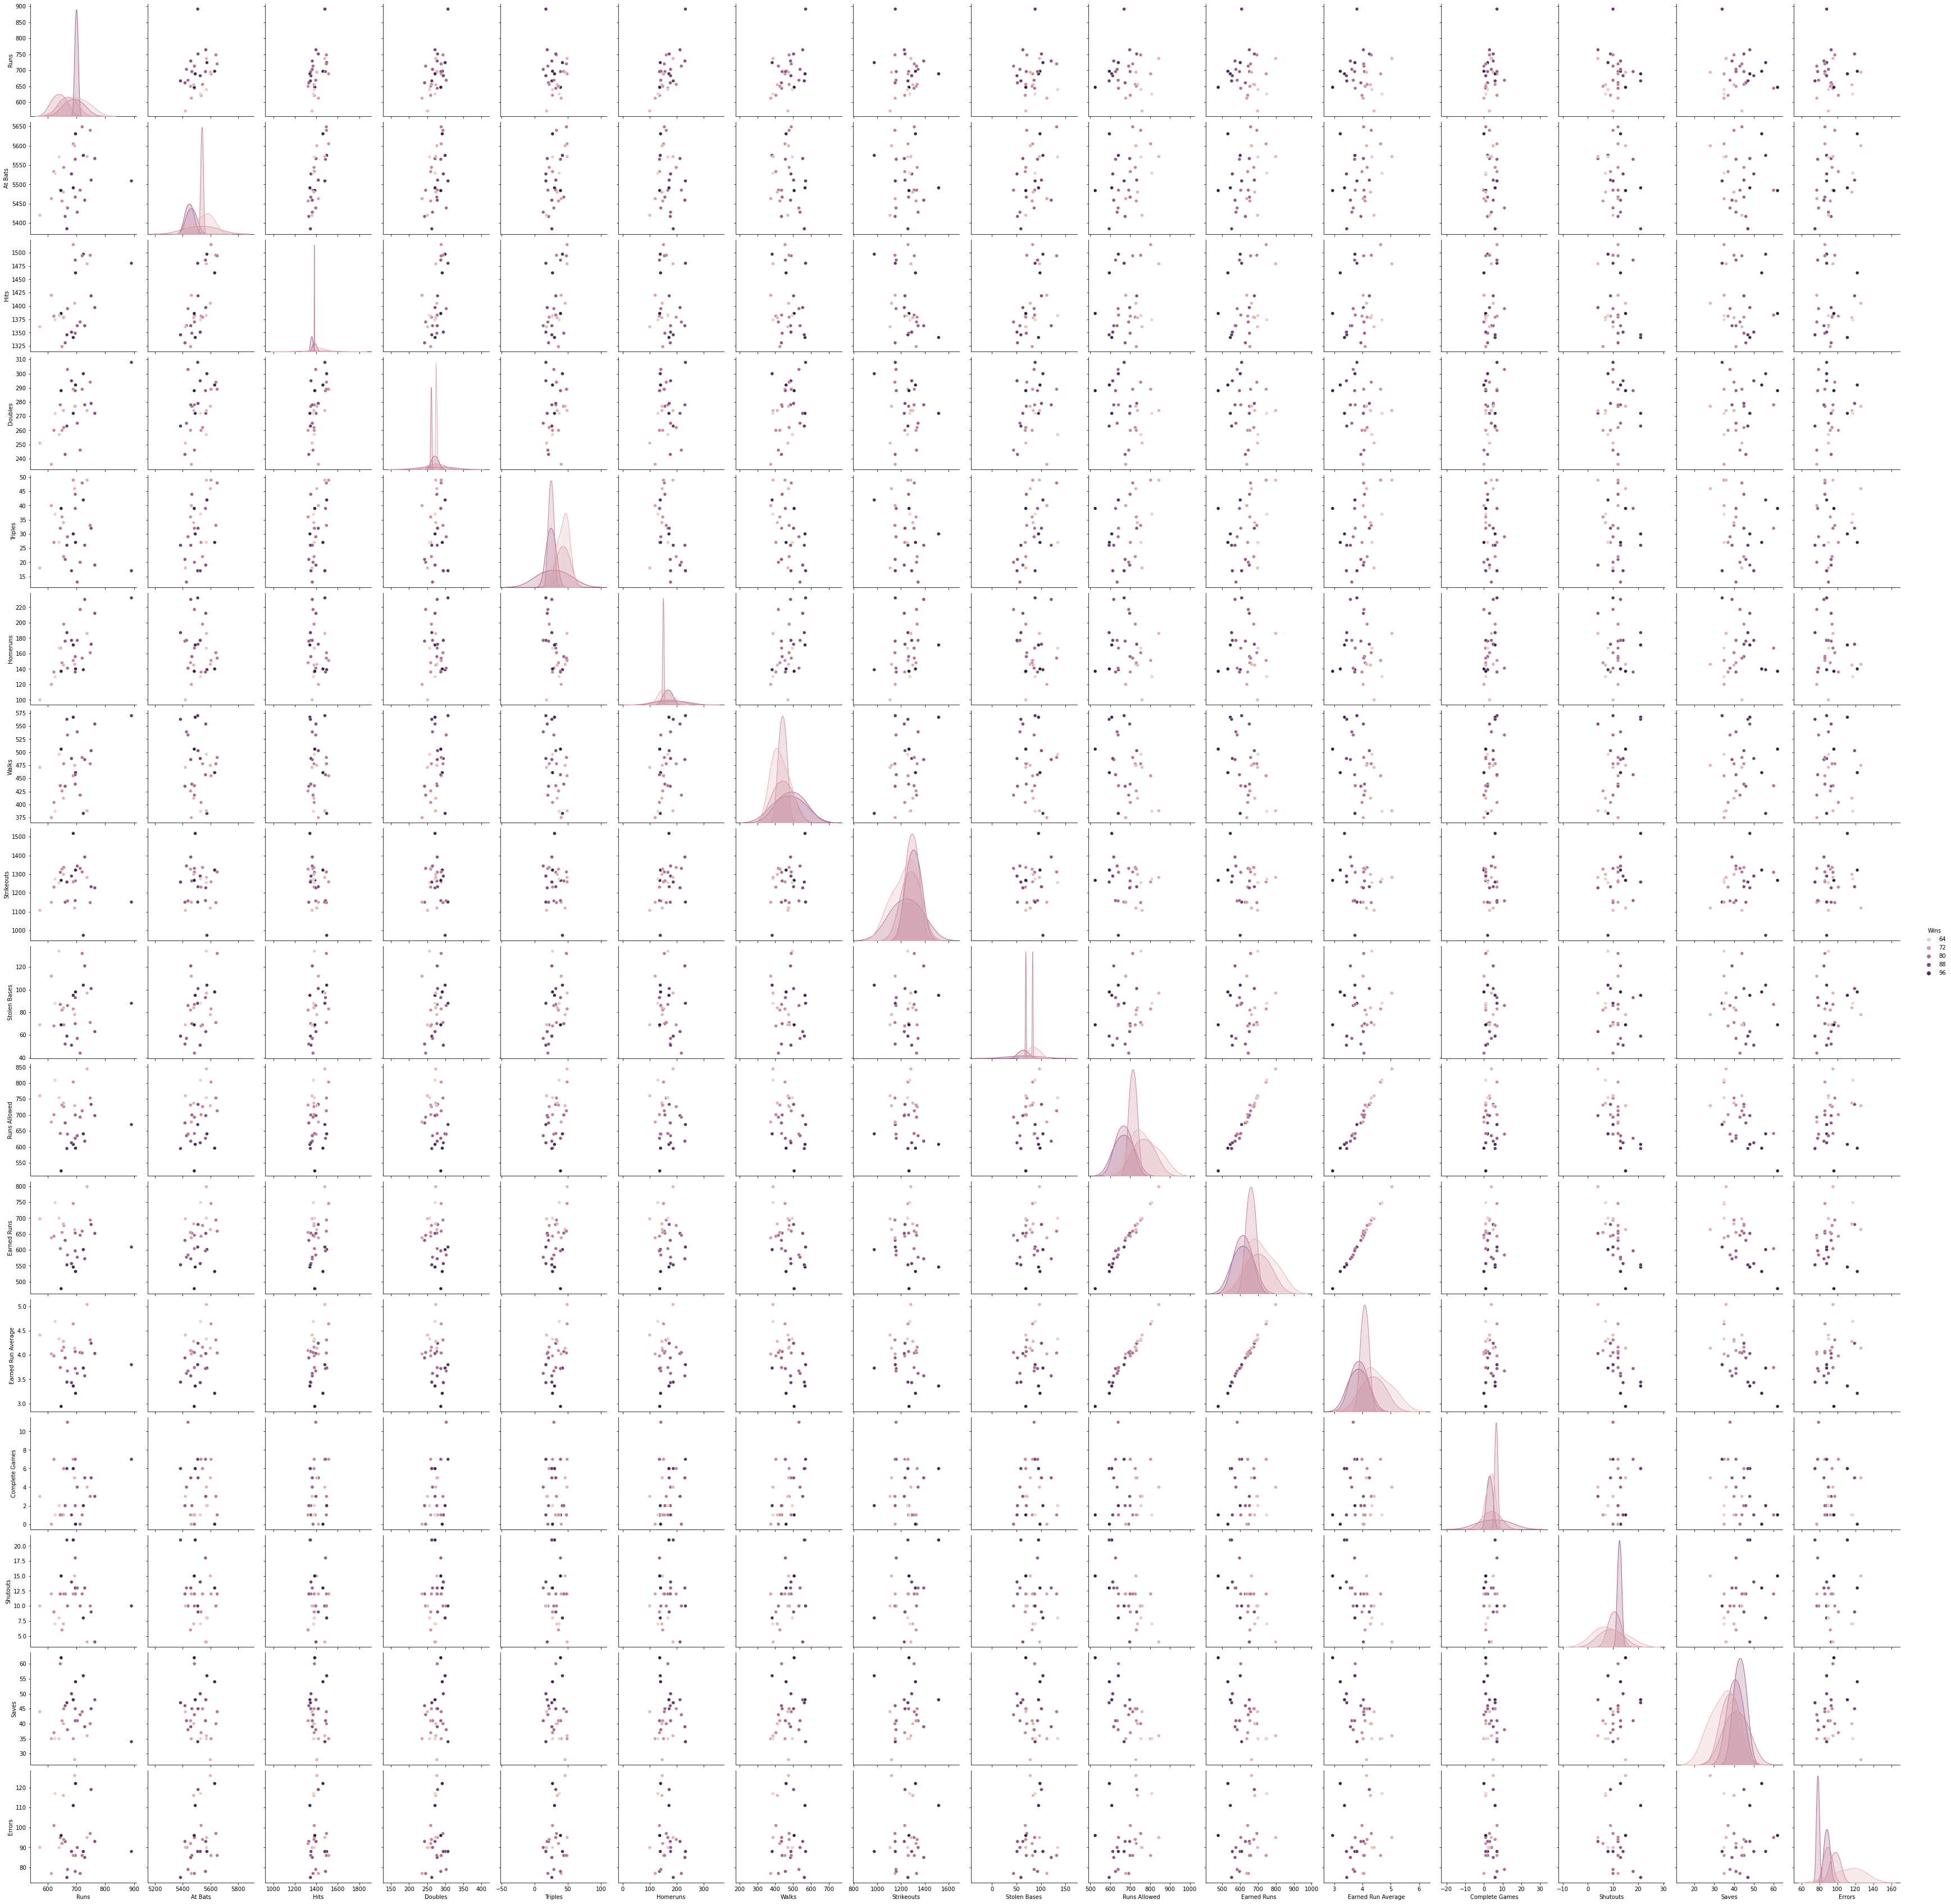

In [16]:
plt.figure(figsize=[20,20])
sns.pairplot(df, hue='Wins', size=3.0)
plt.show()

### Describing

In [17]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


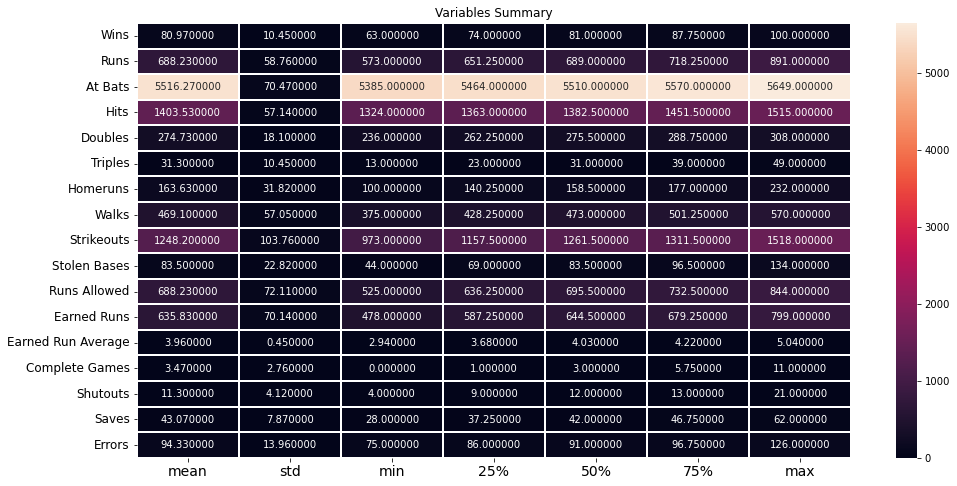

In [18]:
plt.figure(figsize=[16,8])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Variables Summary')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Outcomes of Variable Summary Table:

We're determining the mean, standard deviation, minimum and maximum values of all the columns.

Wins:

Mean: 80.97
std: 10.45
Minimum Value: 63
Maximum Value: 100
Runs:

Mean: 688.23
std: 58.76
Minimum Value: 573
Maximum Value: 891
At Bats:

Mean: 5516.27
std: 70.47
Minimum Value: 5385
Maximum Value: 5649
Hits:

Mean: 1403.53
std: 57.14
Minimum Value: 1324
Maximum Value: 1515
Doubles:

Mean: 274.73
std: 18.10
Minimum Value: 236
Maximum Value: 308
Triples:

Mean: 31.30
std: 10.45
Minimum Value: 13
Maximum Value: 49
Homeruns:

Mean: 163.63
std: 31.82
Minimum Value: 100
Maximum Value: 232
Walks:

Mean: 469.10
std: 57.05
Minimum Value: 375
Maximum Value: 570
Strikeouts:

Mean: 1248.20
103.76
Minimum Value: 973
Maximum Value: 1518

### Correlation of the variables:

In [19]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


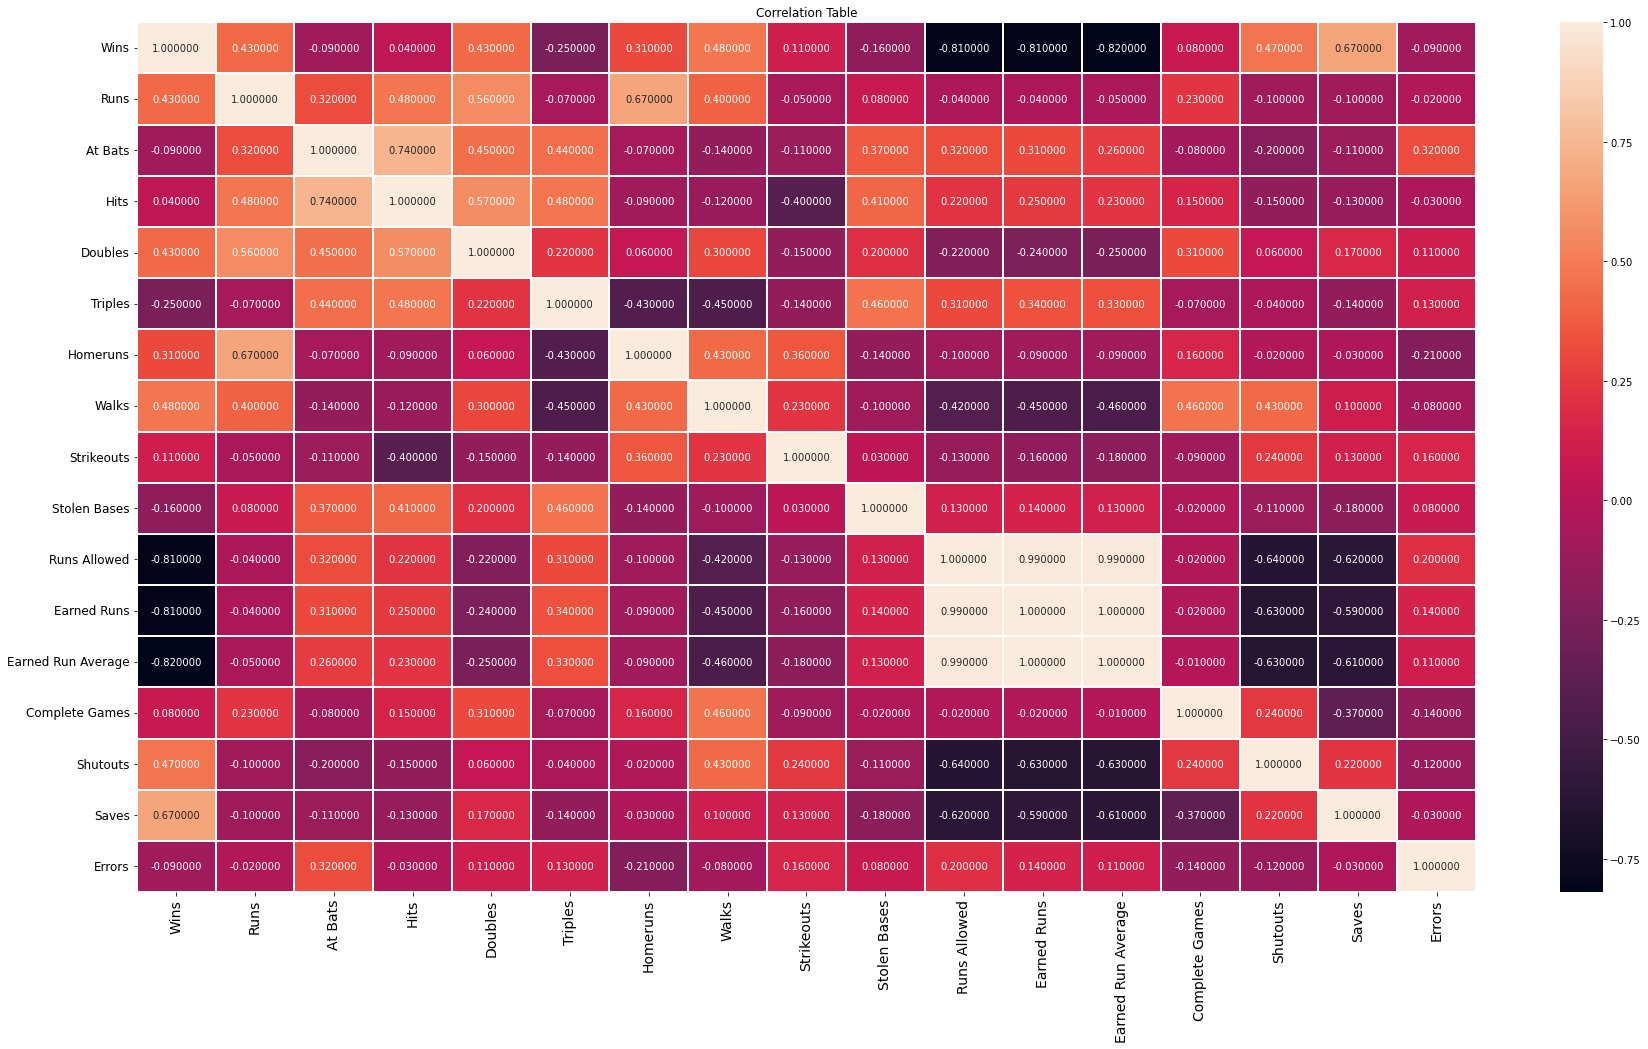

In [20]:
plt.figure(figsize=[30,16])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

### Finding Outliers

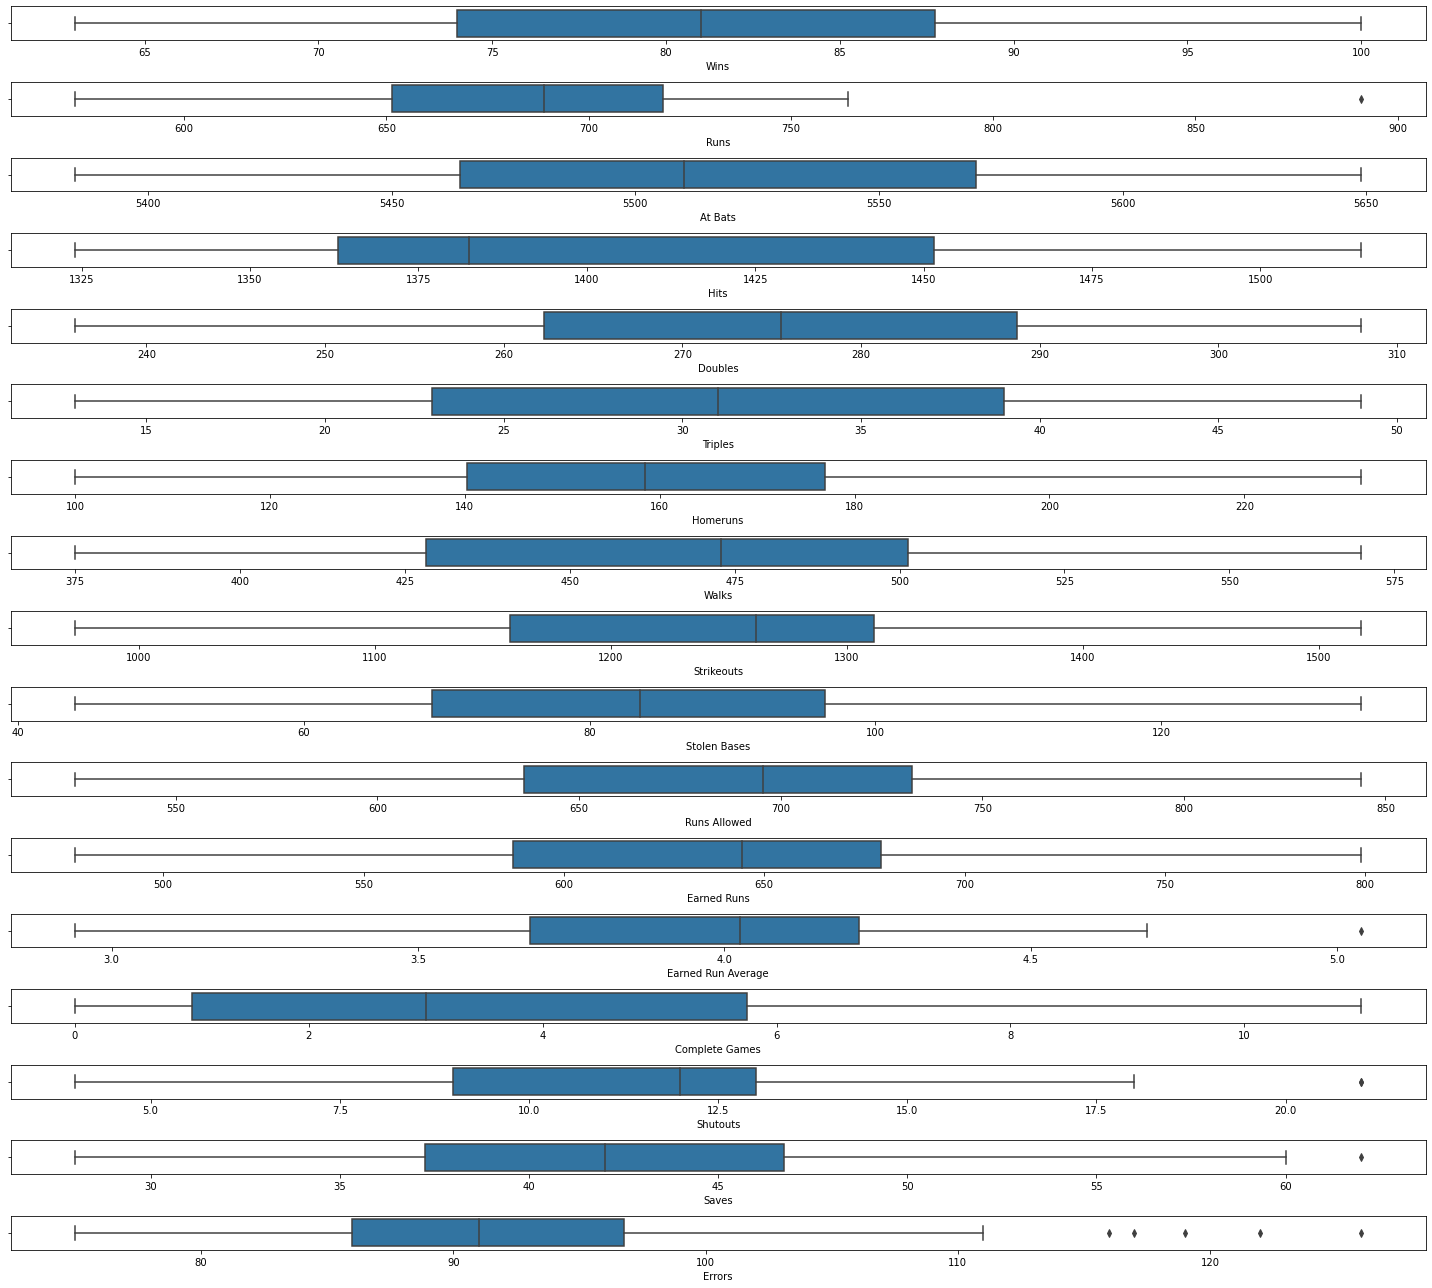

In [21]:
fig, axs = plt.subplots(17, figsize = (20,18))
plt1 = sns.boxplot(df['Wins'], ax = axs[0])
plt2 = sns.boxplot(df['Runs'], ax = axs[1])
plt3 = sns.boxplot(df['At Bats'], ax = axs[2])
plt4 = sns.boxplot(df['Hits'], ax = axs[3])
plt5 = sns.boxplot(df['Doubles'], ax = axs[4])
plt6 = sns.boxplot(df['Triples'], ax = axs[5])
plt7 = sns.boxplot(df['Homeruns'], ax = axs[6])
plt8 = sns.boxplot(df['Walks'], ax = axs[7])
plt9 = sns.boxplot(df['Strikeouts'], ax = axs[8])
plt10 = sns.boxplot(df['Stolen Bases'], ax = axs[9])
plt11 = sns.boxplot(df['Runs Allowed'], ax = axs[10])
plt12 = sns.boxplot(df['Earned Runs'], ax = axs[11])
plt13 = sns.boxplot(df['Earned Run Average'], ax = axs[12])
plt14 = sns.boxplot(df['Complete Games'], ax = axs[13])
plt15 = sns.boxplot(df['Shutouts'], ax = axs[14])
plt16 = sns.boxplot(df['Saves'], ax = axs[15])
plt17 = sns.boxplot(df['Errors'], ax=axs[16])
plt.tight_layout()

### Checking the Skewness

In [22]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

### Data Cleaning

### Removing Outliers through zscore

In [23]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(30, 17)

In [24]:
thershold = 3
print (np.where(z>3))

(array([5]), array([1]))


In [25]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [26]:
loss_per = ((30-29)/30)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.3333333333333335


In [27]:
x = df_new.drop(['Wins'], axis=1)
y = df_new['Wins']

### Removing Skewness:

In [30]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[ 9.62570397e-01,  0.00000000e+00,  0.00000000e+00,
         1.70619736e+00,  1.00840315e+00, -7.38544443e-01,
        -1.59242918e+00, -2.52485057e+00,  9.35979151e-01,
        -6.63602706e-01, -5.14026953e-01, -5.14964012e-01,
        -3.20269404e-01, -7.88438376e-01,  1.52546924e+00,
        -3.31639456e-01],
       [ 2.97313587e-01,  0.00000000e+00,  0.00000000e+00,
         1.26596750e-01,  1.19487167e+00, -1.00554539e-01,
        -4.68594202e-01,  8.82924565e-02, -5.19372482e-01,
         1.55050259e-01,  2.27683329e-01,  2.33726426e-01,
        -3.20269404e-01,  2.31953657e-01,  3.16816990e-01,
        -5.28285099e-01],
       [-3.13641993e-01,  0.00000000e+00,  0.00000000e+00,
         1.93618530e+00, -2.47152166e-01, -6.59835330e-01,
         1.23707871e+00, -9.35512272e-01,  2.20913692e-01,
        -6.77484166e-01, -7.55238041e-01, -6.46332408e-01,
         2.05123716e+00, -2.57567118e-01, -6.61563767e-01,
        -1.34323759e+00],
       [-1.30700838e+00,  0.00000000e

### StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 9.62570397e-01,  0.00000000e+00,  0.00000000e+00,
         1.70619736e+00,  1.00840315e+00, -7.38544443e-01,
        -1.59242918e+00, -2.52485057e+00,  9.35979151e-01,
        -6.63602706e-01, -5.14026953e-01, -5.14964012e-01,
        -3.20269404e-01, -7.88438376e-01,  1.52546924e+00,
        -3.31639456e-01],
       [ 2.97313587e-01,  0.00000000e+00,  0.00000000e+00,
         1.26596750e-01,  1.19487167e+00, -1.00554539e-01,
        -4.68594202e-01,  8.82924565e-02, -5.19372482e-01,
         1.55050259e-01,  2.27683329e-01,  2.33726426e-01,
        -3.20269404e-01,  2.31953657e-01,  3.16816990e-01,
        -5.28285099e-01],
       [-3.13641993e-01,  0.00000000e+00,  0.00000000e+00,
         1.93618530e+00, -2.47152166e-01, -6.59835330e-01,
         1.23707871e+00, -9.35512272e-01,  2.20913692e-01,
        -6.77484166e-01, -7.55238041e-01, -6.46332408e-01,
         2.05123716e+00, -2.57567118e-01, -6.61563767e-01,
        -1.34323759e+00],
       [-1.30700838e+00,  0.00000000e

### Data Preprocessing:

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Training

LinerRegression

In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [ 4.27392833e+00  4.98490138e-14 -2.93098879e-14 -1.53892956e+00
  1.04379320e+00 -4.73202209e-01 -1.78378992e+00 -6.93828078e-01
 -8.02175908e-01  1.80646796e+01 -1.18179794e+01 -1.20022085e+01
  2.13191640e+00  4.36305346e-01  5.43699641e+00 -1.40857339e+00]
Intercept : 80.74643006045987


In [34]:
y_pred = LR.predict(x_test)
y_pred

array([80.86169257, 91.62131611, 78.28592537, 71.01362437, 81.01649456,
       82.84741877])

Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5)
rid.fit(x_train,y_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

Ridge Coefficients : [ 3.82983483  0.          0.         -0.2238739   0.36984647 -0.69650127
 -0.81120039 -0.42949187 -1.06462217  0.53944685 -2.09990251 -4.12351371
  1.07487746  0.55780879  4.06924247 -0.34240979]
Intercept : 80.3410888850166


In [36]:
rid_pred = rid.predict(x_test)

rid_pred

array([74.442216  , 89.46248341, 76.80373686, 69.75021814, 80.72257541,
       82.71034785])

RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)

RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [38]:
rf_pred = RF.predict(x_test) 
rf_pred

array([76.62849365, 90.14935453, 77.40706974, 75.94110152, 74.32526169,
       75.96559647])

KNeighborsRegressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [40]:
knn_pred = KNN.predict(x_test)
knn_pred

array([75.5, 84.5, 84. , 80.5, 78.5, 85. ])

#### Root Mean Squared Error

In [41]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test, rid_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for RandomForestRegressor is :', rmse_RF)
print('Root Mean Squared Error for KNeighborsRegressor is :', rmse_KNN)

Root Mean Squared Error for LinearRegression is : 4.708078758580904
Root Mean Squared Error for Ridge Regression is : 4.09496114863033
Root Mean Squared Error for RandomForestRegressor is : 7.001119360922723
Root Mean Squared Error for KNeighborsRegressor is : 8.306623862918075


R-Squred

In [42]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y_test, y_pred))
print('R2 Score for Ridge_Regression is :', r2_score(y_test, rid_pred))
print('R2 Score for RandomForestRegressor is :', r2_score(y_test, rf_pred))
print('R2 score for KNeighborsRegressor is :', r2_score(y_test, knn_pred))

R2 Score for LinearRegression is : 0.7699030560864979
R2 Score for Ridge_Regression is : 0.8259303791474897
R2 Score for RandomForestRegressor is : 0.49118679267245324
R2 score for KNeighborsRegressor is : 0.2837370242214533


### Model Saving

In [43]:
import pickle
filename = 'baseball_case_study.pkl'
pickle.dump(rid, open(filename,'wb'))

### Conclusion

Checking the diffrence between Predicted and Original Values

In [44]:
a = np.array(y_test)
predicted = np.array(rid.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,74,74.442216
1,97,89.462483
2,76,76.803737
3,67,69.750218
4,78,80.722575
5,88,82.710348


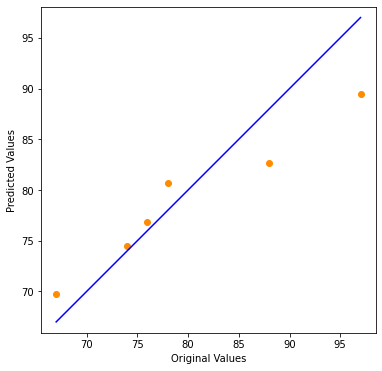

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(a, predicted, color='darkorange')

p1 = max(max(predicted), max(a))
p2 = min(min(predicted), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Original Values', fontsize=10)
plt.ylabel('Predicted Values', fontsize=10)
plt.axis('equal')
plt.show()